# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('M9_SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [7]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [3]:
sinasc_lat = sinasc_raw[['munResLat', 'QTDGESTANT', 'QTDPARTNOR']].copy()

In [4]:
sinasc_lat['munResLat'].describe()

count    27027.000000
mean       -10.377988
std          1.372942
min        -13.499760
25%        -11.433870
50%        -10.435950
75%         -8.768890
max         -8.768890
Name: munResLat, dtype: float64

In [9]:
sinasc_raw['SEMAGESTAC'].unique()

array([39., 38., 40., 41., 43., 42., 35., 37., 36., 34., 26., 23., 28.,
       32., 33., 31., 30., 24., 22., 27., 44., nan, 45., 29., 25., 21.,
       19.])

In [11]:
latitude = pd.cut(sinasc_lat['munResLat'], [-13.499760, -10.5, -8.768890], labels=['Maior que -10.5', 'Menor que -10.5'])

In [13]:
exe01 = sinasc_lat.groupby(latitude, observed=True)[['QTDGESTANT', 'QTDPARTNOR']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])
exe01

QTDGESTANT                                                  \
                       sum      mean  min   max median       std       var   
munResLat                                                                    
Maior que -10.5    15219.0  1.187037  0.0  15.0    1.0  1.305499  1.704328   
Menor que -10.5    17615.0  1.364024  0.0  52.0    1.0  1.492482  2.227501   

                QTDPARTNOR                                                  
                       sum      mean  min   max median       std       var  
munResLat                                                                   
Maior que -10.5     5782.0  0.453668  0.0  41.0    0.0  1.125619  1.267019  
Menor que -10.5     8771.0  0.711759  0.0  40.0    0.0  1.279042  1.635949

In [19]:
sinasc_lat['QTDGESTANT'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  6.,  7.,  8.,  5., 12., nan,  9., 11.,
       10., 14., 15., 13., 52.])

In [21]:
sinasc_lat['QTDPARTNOR'].unique()

array([ 0.,  1.,  2.,  3.,  6.,  5.,  4., nan,  7.,  8.,  9., 10., 12.,
       40., 14., 30., 41.])

**ANÁLISE DOS DADOS:**

É provável que o valor máximo encontrado de 52 gestações seja um erro, dado que esse número parece excessivamente alto para uma única mulher. Da mesma forma, a presença dos valores 30, 40 e 41 na variável referente ao número de partos normais também levanta suspeitas de inconsistências nos dados.

A análise sugere que a maioria dos partos em Rondônia, independentemente da latitude do município, são cesarianas, uma vez que a média de partos normais é menor que 0 em ambas as faixas de latitude analisadas. Isso pode indicar uma preferência ou tendência significativa por partos cesarianos na região.

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [23]:
sinasc_area = sinasc_raw[['munResArea', 'QTDPARTNOR', 'QTDPARTCES']]
sinasc_area.head(5)

,munResArea,QTDPARTNOR,QTDPARTCES
0,7067.025,0.0,0.0
1,7067.025,0.0,1.0
2,7067.025,1.0,1.0
3,3958.273,0.0,0.0
4,7067.025,0.0,1.0


In [25]:
sinasc_area['munResArea'].describe()

count    27027.000000
mean     14702.799767
std      13706.177751
min        459.978000
25%       3792.998000
50%       6896.648000
75%      34096.394000
max      34096.394000
Name: munResArea, dtype: float64

In [27]:
area = pd.cut(sinasc_area['munResArea'], [0, 3000, 34100], labels=['Menor que 3000', 'Maior que 3000'])

In [29]:
exe02 = sinasc_area.groupby(area, observed=True)[['QTDPARTNOR', 'QTDPARTCES']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])
exe02

QTDPARTNOR                                                  \
                      sum      mean  min   max median       std       var   
munResArea                                                                  
Menor que 3000     1912.0  0.371334  0.0  10.0    0.0  0.856441  0.733490   
Maior que 3000    12659.0  0.632982  0.0  41.0    0.0  1.278932  1.635668   

               QTDPARTCES                                                  
                      sum      mean  min   max median       std       var  
munResArea                                                                 
Menor que 3000     2952.0  0.572981  0.0   5.0    0.0  0.749368  0.561553  
Maior que 3000    10184.0  0.507070  0.0  12.0    0.0  0.744981  0.554997

**ANÁLISE DOS DADOS:**

Considerando que as médias de partos normais e cesarianas são menores que 1 para ambas as faixas de latitude, podemos levantar a hipótese de que a maioria das mulheres na região tem apenas um filho. Esta descoberta contradiz a hipótese inicial de que a maioria dos partos seriam cesarianas.

Além disso, o desvio padrão e a variância dos partos normais são os únicos valores que excedem 1 entre os municípios com área maior que 3.000 km². Esse fato pode ser explicado pela possível ocorrência de um erro de compilação. Um exemplo disso seria o registro de uma mulher com um histórico de 41 partos normais anteriores ao período registrado em 2019, o que parece pouco plausível e sugere uma inconsistência nos dados.

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [31]:
sinasc_alt = sinasc_raw[['munResAlt', 'CONSPRENAT', 'SEMAGESTAC']].copy()
sinasc_alt.head(5)

,munResAlt,CONSPRENAT,SEMAGESTAC
0,338.0,8.0,39.0
1,338.0,10.0,38.0
2,338.0,8.0,40.0
3,397.0,6.0,38.0
4,338.0,8.0,38.0


In [33]:
altitude = pd.qcut(sinasc_alt['munResAlt'], 4)
exe03 = sinasc_alt.groupby(altitude, observed=True)[['CONSPRENAT', 'SEMAGESTAC']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])
exe03

CONSPRENAT                                                   \
                      sum      mean  min   max median       std        var   
munResAlt                                                                    
(84.999, 87.0]    60904.0  7.506039  0.0  99.0    7.0  6.573333  43.208703   
(87.0, 153.0]     38488.0  8.116407  0.0  99.0    8.0  4.595554  21.119119   
(153.0, 191.0]    60503.0  8.815824  0.0  99.0    9.0  3.905380  15.251997   
(191.0, 595.0]    55542.0  8.708373  0.0  99.0    8.0  4.458784  19.880755   

               SEMAGESTAC                                                    
                      sum       mean   min   max median       std       var  
munResAlt                                                                    
(84.999, 87.0]   311224.0  38.570331  21.0  45.0   39.0  2.100161  4.410676  
(87.0, 153.0]    182302.0  38.566110  21.0  45.0   39.0  2.082467  4.336668  
(153.0, 191.0]   256216.0  38.580937  19.0  45.0   39.0  1.960942  3.845293  
(191.0, 595.0]   244874.0  38.550693  21.0  45.0   39.0  1.914306  3.664569

**ANÁLISE DOS DADOS:**

Observa-se que a média do tempo de gestação nas quatro diferentes faixas de altitude é bastante similar, variando entre 38.55 e 38.58 semanas. No entanto, a variável "Consultas Pré-Natal" merece uma análise mais aprofundada, pois há registros indicando que algumas mulheres teriam comparecido a até 99 consultas durante a gravidez, o que parece altamente improvável e pode indicar a presença de inconsistências nos dados.

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [35]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [37]:
sinasc_idade = sinasc_raw[['munResNome', 'IDADEMAE', 'DTNASC']].copy()
sinasc_idade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   munResNome  27028 non-null  object
 1   IDADEMAE    27028 non-null  int64 
 2   DTNASC      27028 non-null  object
dtypes: int64(1), object(2)
memory usage: 633.6+ KB


In [39]:
sinasc_idade.head()

,munResNome,IDADEMAE,DTNASC
0,Alta Floresta D'Oeste,19,2019-02-19
1,Alta Floresta D'Oeste,29,2019-02-21
2,Alta Floresta D'Oeste,37,2019-02-25
3,Alto Alegre dos Parecis,30,2019-03-20
4,Alta Floresta D'Oeste,30,2019-03-23


In [41]:
sinasc_idade['DTNASC'] = pd.to_datetime(sinasc_idade['DTNASC'],format='%Y-%m-%d')
sinasc_idade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   munResNome  27028 non-null  object        
 1   IDADEMAE    27028 non-null  int64         
 2   DTNASC      27028 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 633.6+ KB


In [43]:
sinasc_idade['regiao'] = sinasc_idade['munResNome'].map(imediatas)
sinasc_idade.head(5)

,munResNome,IDADEMAE,DTNASC,regiao
0,Alta Floresta D'Oeste,19,2019-02-19,Cacoal
1,Alta Floresta D'Oeste,29,2019-02-21,Cacoal
2,Alta Floresta D'Oeste,37,2019-02-25,Cacoal
3,Alto Alegre dos Parecis,30,2019-03-20,Cacoal
4,Alta Floresta D'Oeste,30,2019-03-23,Cacoal


In [45]:
sinasc_pv = sinasc_idade.pivot_table(values='IDADEMAE',
                                       index='DTNASC',
                                       columns='regiao',
                                       aggfunc='mean',
                                       observed=False)
sinasc_pv

regiao,Ariquemes,Cacoal,Jaru,Ji-Paraná,Porto Velho,Vilhena
DTNASC,,,,,,
2019-01-01,23.200000,23.250000,31.000000,24.142857,21.388889,27.750000
2019-01-02,26.166667,27.666667,30.800000,25.545455,26.050000,28.727273
2019-01-03,24.142857,27.846154,26.000000,27.000000,26.638889,23.375000
2019-01-04,24.666667,25.230769,22.500000,23.125000,28.814815,26.000000
2019-01-05,22.888889,23.200000,23.250000,27.100000,27.250000,28.200000
...,...,...,...,...,...,...
2019-12-27,24.666667,24.000000,25.333333,27.466667,28.410256,27.000000
2019-12-28,23.833333,22.888889,23.333333,26.375000,26.291667,22.666667
2019-12-29,23.166667,24.100000,24.666667,24.125000,25.470588,24.250000


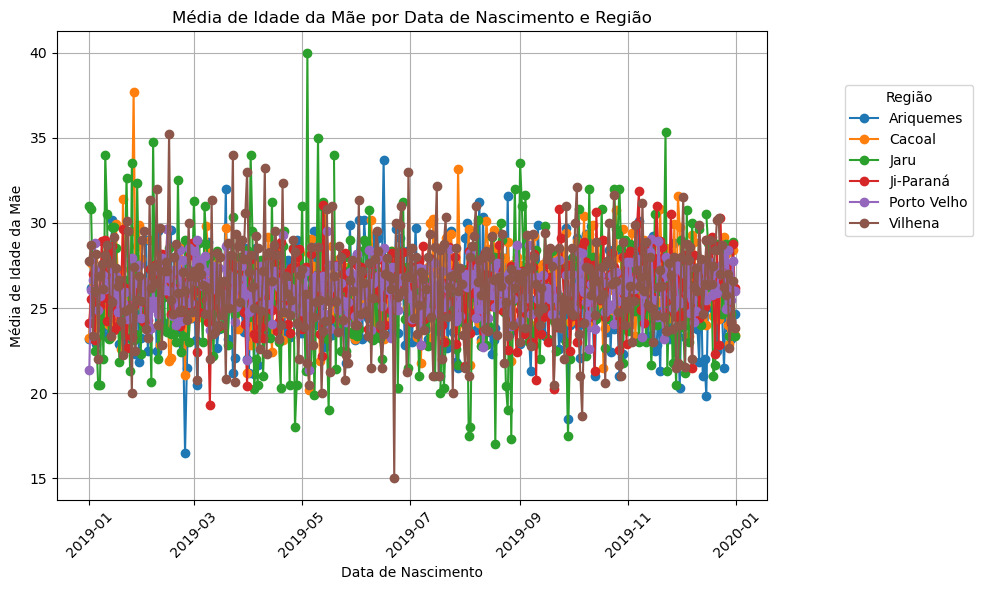

In [47]:
fig, ax = plt.subplots(figsize=(10, 6))

for column in sinasc_pv.columns:
    plt.plot(sinasc_pv.index, sinasc_pv[column], marker='o', label=column)

ax.set_title('Média de Idade da Mãe por Data de Nascimento e Região')
ax.set_xlabel('Data de Nascimento')
ax.set_ylabel('Média de Idade da Mãe')

ax.legend(title='Região', loc="upper left", bbox_to_anchor=(1.1, 0.9))

ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout() 

plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


O Índice de Desenvolvimento Humano varia de 0 até 1, e nesta lista é dividido em cinco categorias: 

IDH muito alto (0,800 – 1,000), 
IDH alto (0,700 – 0,799), 
IDH médio (0,600 0,699), 
IDH baixo (0,500 – 0,599)
IDH muito baixo (0,000 – 0,499)

In [188]:
idh_url = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M"

idh_cont = pd.read_html(idh_url)
idh_raw = idh_cont[0]
idh = idh_raw.copy()
idh.columns

MultiIndex([(      'Posição',         'Posição', 'IDH-M muito alto'),
            (    'Município',       'Município', 'IDH-M muito alto'),
            ('Dados de 2010',   'IDH municipal', 'IDH-M muito alto'),
            ('Dados de 2010',       'IDH renda', 'IDH-M muito alto'),
            ('Dados de 2010', 'IDH longevidade', 'IDH-M muito alto'),
            ('Dados de 2010',    'IDH educação', 'IDH-M muito alto')],
           )

In [190]:
idh = idh.drop(columns=[(      'Posição',         'Posição', 'IDH-M muito alto'),
                        ('Dados de 2010',       'IDH renda', 'IDH-M muito alto'),
                        ('Dados de 2010', 'IDH longevidade', 'IDH-M muito alto'),
                        ('Dados de 2010',    'IDH educação', 'IDH-M muito alto')])

In [192]:
idh.columns = ['_'.join(col).strip() for col in idh.columns.values]

In [194]:
idh = idh.rename(columns={ 'Município_Município_IDH-M muito alto': 'município',
                           'Dados de 2010_IDH municipal_IDH-M muito alto': 'idh'})

In [196]:
idh = idh.drop([0, 1, 9, 46, 56, 57])

In [198]:
idh.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 2 to 55
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   município  52 non-null     object
 1   idh        52 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [200]:
idh['idh'] = idh['idh'].astype(float)
idh.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 2 to 55
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   município  52 non-null     object 
 1   idh        52 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


In [202]:
idh_bins = [0, 0.499, 0.599, 0.699, 0.799, 1.0]
idh_labels = ['IDH muito baixo', 'IDH baixo', 'IDH médio', 'IDH alto', 'IDH muito alto']

idh['idh_cat'] = pd.cut(idh['idh'], bins=idh_bins, labels=idh_labels)

In [204]:
idh_pv = idh.pivot_table(values='idh',
                         index=['idh_cat', 'município'],
                         aggfunc='mean',
                         dropna=True,
                         observed=False)
idh_pv

idh
idh_cat   município                       
IDH baixo Alto Alegre dos Parecis    0.592
          Campo Novo de Rondônia     0.593
          Governador Jorge Teixeira  0.596
          Machadinho d'Oeste         0.596
          Nova Mamoré                0.587
          Nova União                 0.587
          Seringueiras               0.598
          Theobroma                  0.589
          Vale do Anari              0.584
IDH médio Alta Floresta d'Oeste      0.641
          Alto Paraíso               0.625
          Alvorada d'Oeste           0.643
          Buritis                    0.616
          Cabixi                     0.650
          Cacaulândia                0.646
          Candeias do Jamari         0.649
          Castanheiras               0.658
          Cerejeiras                 0.692
          Chupinguaia                0.652
          Colorado do Oeste          0.685
          Corumbiara                 0.613
          Costa Marques              0.611
          Cujubim                    0.612
          Espigão d'Oeste            0.672
          Guajará-Mirim              0.657
          Itapuã do Oeste            0.614
          Jaru                       0.689
          Ministro Andreazza         0.638
          Mirante da Serra           0.643
          Monte Negro                0.607
          Nova Brasilândia d'Oeste   0.643
          Novo Horizonte do Oeste    0.634
          Ouro Preto do Oeste        0.682
          Parecis                    0.617
          Pimenteiras do Oeste       0.665
          Presidente Médici          0.664
          Primavera de Rondônia      0.641
          Rio Crespo                 0.643
          Santa Luzia d'Oeste        0.670
          São Felipe d'Oeste         0.649
          São Francisco do Guaporé   0.611
          São Miguel do Guaporé      0.646
          Teixeirópolis              0.643
          Urupá                      0.609
          Vale do Paraíso            0.627
IDH alto  Ariquemes                  0.702
          Cacoal                     0.718
          Ji-Paraná                  0.714
          Pimenta Bueno              0.710
          Porto Velho                0.736
          Rolim de Moura             0.700
          Vilhena                    0.731

A análise revela que a maior parte dos municípios do estado de Rondônia possui Índice de Desenvolvimento Humano (IDH) classificado entre alto e médio. Embora esse cenário seja encorajador, ele também evidencia um considerável potencial para melhorias.

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


O índice varia de zero (valor mínimo) até 1 (valor máximo), sendo considerado:

Alto, resultados superiores a 0,8 pontos;
Moderado, resultados entre 0,6 e 0,8 pontos;
Regular, resultados entre 0,4 e 0,6 pontos;
Baixo, resultados inferiores a 0,4 pontos

In [266]:
ifdm_url = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM"

ifdm_cont = pd.read_html(ifdm_url)
ifdm_raw = ifdm_cont[0]
ifdm = ifdm_raw.copy()
ifdm.columns

MultiIndex([(                'Posição', 'Desenvolvimento alto'),
            (              'Município', 'Desenvolvimento alto'),
            ('IFDM Consolidado (2013)', 'Desenvolvimento alto')],
           )

In [268]:
ifdm = ifdm.drop([0, 1, 28, 55, 56])

In [270]:
ifdm = ifdm.drop(columns=[(                'Posição', 'Desenvolvimento alto')])

In [272]:
ifdm.columns = ['_'.join(col).strip() for col in ifdm.columns.values]

In [274]:
ifdm = ifdm.rename(columns={'Município_Desenvolvimento alto': 'município',
                            'IFDM Consolidado (2013)_Desenvolvimento alto': 'ifdm'})
ifdm

,município,ifdm
2,Ariquemes,0.7746
3,Vilhena,0.7465
4,Pimenta Bueno,0.7383
5,Porto Velho,0.7257
6,Ji-Paraná,0.7117
7,Cacoal,0.7111
8,Santa Luzia d'Oeste,0.6850
9,Rolim de Moura,0.6785
10,Chupinguaia,0.6766
11,São Miguel do Guaporé,0.6699


In [278]:
ifdm['ifdm'] = ifdm['ifdm'].astype(float)
ifdm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 2 to 54
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   município  52 non-null     object 
 1   ifdm       52 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


In [283]:
ifdm_bins = [0, 0.399, 0.599, 0.799, 1.0]
ifdm_labels = ['baixo', 'regular', 'moderado', 'alto']

ifdm['ifdm_cat'] = pd.cut(ifdm['ifdm'], bins=ifdm_bins, labels=ifdm_labels)
ifdm

,município,ifdm,ifdm_cat
2,Ariquemes,0.7746,moderado
3,Vilhena,0.7465,moderado
4,Pimenta Bueno,0.7383,moderado
5,Porto Velho,0.7257,moderado
6,Ji-Paraná,0.7117,moderado
7,Cacoal,0.7111,moderado
8,Santa Luzia d'Oeste,0.6850,moderado
9,Rolim de Moura,0.6785,moderado
10,Chupinguaia,0.6766,moderado
11,São Miguel do Guaporé,0.6699,moderado


In [285]:
ifdm_pv = ifdm.pivot_table(values='ifdm',
                         index=['ifdm_cat', 'município'],
                         aggfunc='mean',
                         dropna=True,
                         observed=False)
ifdm_pv

ifdm
ifdm_cat município                        
regular  Alto Alegre dos Parecis    0.5046
         Alto Paraíso               0.5735
         Alvorada d'Oeste           0.5919
         Cabixi                     0.5887
         Cacaulândia                0.5721
         Campo Novo de Rondônia     0.5272
         Castanheiras               0.5430
         Corumbiara                 0.5759
         Costa Marques              0.5626
         Cujubim                    0.5055
         Espigão d'Oeste            0.5973
         Governador Jorge Teixeira  0.4562
         Guajará-Mirim              0.5541
         Itapuã do Oeste            0.5903
         Machadinho d'Oeste         0.5322
         Ministro Andreazza         0.5657
         Mirante da Serra           0.5519
         Nova Brasilândia d'Oeste   0.5857
         Nova Mamoré                0.5084
         Nova União                 0.5571
         Novo Horizonte do Oeste    0.5858
         Parecis                    0.5502
         Seringueiras               0.5922
         Theobroma                  0.5405
         Vale do Anari              0.5710
         Vale do Paraíso            0.5818
moderado Alta Floresta d'Oeste      0.6337
         Ariquemes                  0.7746
         Buritis                    0.6199
         Cacoal                     0.7111
         Candeias do Jamari         0.6199
         Cerejeiras                 0.6137
         Chupinguaia                0.6766
         Colorado do Oeste          0.6473
         Jaru                       0.6450
         Ji-Paraná                  0.7117
         Monte Negro                0.6016
         Ouro Preto do Oeste        0.6261
         Pimenta Bueno              0.7383
         Pimenteiras do Oeste       0.6501
         Porto Velho                0.7257
         Presidente Médici          0.6140
         Primavera de Rondônia      0.6384
         Rio Crespo                 0.6430
         Rolim de Moura             0.6785
         Santa Luzia d'Oeste        0.6850
         São Felipe d'Oeste         0.6153
         São Francisco do Guaporé   0.6214
         São Miguel do Guaporé      0.6699
         Teixeirópolis              0.6500
         Urupá                      0.6006
         Vilhena                    0.7465

A análise do Índice FIRJAN de Desenvolvimento Municipal (IFDM) dos municípios de Rondônia revela que o estado apresenta um IFDM predominante nas faixas 'moderado' e 'regular'. Esse cenário, ao contrário do panorama observado na análise do IDH, não é tão encorajador, pois nenhum município foi classificado com IFDM 'alto'. Por outro lado, também não há registro de municípios com IFDM 'baixo', o que sugere uma distribuição mais equilibrada, apesar da ausência de desempenhos excepcionais. 

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [340]:
pib_url = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB"

pib_cont = pd.read_html(pib_url)
pib_1b = pib_cont[0]
pib_1b['faixa'] = 'Acima de 1 Bilhão'

pib_500 = pib_cont[1]
pib_500['faixa'] = 'Acima de 500 Milhões'

pib_300 = pib_cont[2]
pib_300['faixa'] = 'Acima de 300 Milhões'

pib_200 = pib_cont[3]
pib_200['faixa'] = 'Acima de 200 Milhões'

pib_100 = pib_cont[4]
pib_100['faixa'] = 'Acima de 100 Milhões'

pib_1 = pib_cont[5]
pib_1['faixa'] = 'Até 100 Milhões'

In [342]:
pib = pd.concat([pib_1b, pib_500, pib_300, pib_200, pib_100, pib_1], axis=0, ignore_index=True)
pib

Posição                                 Município         PIB Alteração  \
   Em 2019 Mudança (2014)                  Município         PIB Alteração   
0      1.0            (0)                Porto Velho  17 912 070       NaN   
1      2.0            (0)                  Ji-Paraná   3 783 972       NaN   
2      3.0            (0)                    Vilhena   2 831 175       NaN   
3      4.0            (0)                  Ariquemes   2 579 830       NaN   
4      5.0            (0)                     Cacoal   2 261 644       NaN   
5      6.0            (0)                       Jaru   1 500 890       NaN   
6      7.0            (0)             Rolim de Moura   1 283 434       NaN   
7      8.0            (0)              Pimenta Bueno   1 164 877       NaN   
8      9.0            (0)              Guajará-Mirim     893 000       NaN   
9     10.0            (0)        Ouro Preto do Oeste     834 000       NaN   
10    11.0            (1)                    Buritis     726 000       NaN   
11    12.0            (2)        Machadinho do Oeste     633 000       NaN   
12    13.0            (2)            Espigão d'Oeste     625 000       NaN   
13    14.0            (1)      São Miguel do Guaporé     616 000       NaN   
14    15.0            (3)         Candeias do Jamari     548 000       NaN   
15    16.0            (1)                Nova Mamoré     529 000       NaN   
16    17.0            (2)                 Cerejeiras     507 000       NaN   
17    18.0            (3)     Alta Floresta do Oeste     496 000       NaN   
18    19.0            (3)          Presidente Médici     428 000       NaN   
19    20.0            (3)                    Cujubim     385 000       NaN   
20    21.0            (1)  Nova Brasilândia do Oeste     360 000       NaN   
21    22.0            (2)               Alto Paraíso     358 000       NaN   
22    23.0            (2)   São Francisco do Guaporé     353 000       NaN   
23    24.0            (4)          Colorado do Oeste     335 000       NaN   
24     NaN            NaN                Monte Negro     219 152       NaN   
25     NaN            NaN    Alto Alegre dos Parecis     213 410       NaN   
26     NaN            NaN     Campo Novo de Rondônia     208 821       NaN   
27     NaN            NaN          Alvorada do Oeste     204 098       NaN   
28     NaN            NaN                Chupinguaia     190 331       NaN   
29     NaN            NaN                 Corumbiara     188 218       NaN   
30     NaN            NaN         Ministro Andreazza     174 633       NaN   
31     NaN            NaN                      Urupá     172 143       NaN   
32     NaN            NaN              Costa Marques     171 878       NaN   
33     NaN            NaN               Seringueiras     169 429       NaN   
34     NaN            NaN           Mirante da Serra     163 955       NaN   
35     NaN            NaN  Governador Jorge Teixeira     148 027       NaN   
36     NaN            NaN                  Theobroma     140 601       NaN   
37     NaN            NaN       Santa Luzia do Oeste     135 934       NaN   
38     NaN            NaN    Novo Horizonte do Oeste     129 399       NaN   
39     NaN            NaN            Itapuã do Oeste     129 351       NaN   
40     NaN            NaN            Vale do Paraíso     116 742       NaN   
41     NaN            NaN                Cacaulândia     116 635       NaN   
42     NaN            NaN                     Cabixi     113 031       NaN   
43     NaN            NaN              Vale do Anari     105 208       NaN   
44     NaN            NaN                 Nova União      92 346       NaN   
45     NaN            NaN                    Parecis      80 759       NaN   
46     NaN            NaN                 Rio Crespo      76 854       NaN   
47     NaN            NaN       Pimenteiras do Oeste      76 756       NaN   
48     NaN            NaN              Teixeirópolis      72 089       NaN   
49     NaN            NaN

In [344]:
pib.columns = ['_'.join(col).strip() for col in pib.columns.values]

In [346]:
pib.columns

Index(['Posição_Em 2019', 'Posição_Mudança (2014)', 'Município_Município',
       'PIB_PIB', 'Alteração_Alteração', 'faixa_', 'Posição_Em 2014',
       'Posição_Mudança (2011)'],
      dtype='object')

In [348]:
pib = pib.drop(columns=['Posição_Em 2019', 
                        'Posição_Mudança (2014)', 
                        'Alteração_Alteração', 
                        'Posição_Em 2014',
                        'Posição_Mudança (2011)'])

In [350]:
pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Município_Município  52 non-null     object
 1   PIB_PIB              52 non-null     object
 2   faixa_               52 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


In [354]:
pib = pib.rename(columns={'Município_Município': 'município',
                          'PIB_PIB': 'pib',
                          'faixa_': 'faixa'})

In [356]:
pib['pib'] = pib['pib'].str.replace(' ', '').astype(int)
pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   município  52 non-null     object
 1   pib        52 non-null     int64 
 2   faixa      52 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [358]:
pib_pv = pib.pivot_table(values='pib',
                         index=['faixa', 'município'],
                         aggfunc='mean',
                         dropna=True,
                         observed=False)
pib_pv

pib
faixa                município                            
Acima de 1 Bilhão    Ariquemes                   2579830.0
                     Cacoal                      2261644.0
                     Jaru                        1500890.0
                     Ji-Paraná                   3783972.0
                     Pimenta Bueno               1164877.0
                     Porto Velho                17912070.0
                     Rolim de Moura              1283434.0
                     Vilhena                     2831175.0
Acima de 100 Milhões Cabixi                       113031.0
                     Cacaulândia                  116635.0
                     Chupinguaia                  190331.0
                     Corumbiara                   188218.0
                     Costa Marques                171878.0
                     Governador Jorge Teixeira    148027.0
                     Itapuã do Oeste              129351.0
                     Ministro Andreazza           174633.0
                     Mirante da Serra             163955.0
                     Novo Horizonte do Oeste      129399.0
                     Santa Luzia do Oeste         135934.0
                     Seringueiras                 169429.0
                     Theobroma                    140601.0
                     Urupá                        172143.0
                     Vale do Anari                105208.0
                     Vale do Paraíso              116742.0
Acima de 200 Milhões Alto Alegre dos Parecis      213410.0
                     Alvorada do Oeste            204098.0
                     Campo Novo de Rondônia       208821.0
                     Monte Negro                  219152.0
Acima de 300 Milhões Alta Floresta do Oeste       496000.0
                     Alto Paraíso                 358000.0
                     Colorado do Oeste            335000.0
                     Cujubim                      385000.0
                     Nova Brasilândia do Oeste    360000.0
                     Presidente Médici            428000.0
                     São Francisco do Guaporé     353000.0
Acima de 500 Milhões Buritis                      726000.0
                     Candeias do Jamari           548000.0
                     Cerejeiras                   507000.0
                     Espigão d'Oeste              625000.0
                     Guajará-Mirim                893000.0
                     Machadinho do Oeste          633000.0
                     Nova Mamoré                  529000.0
                     Ouro Preto do Oeste          834000.0
                     São Miguel do Guaporé        616000.0
Até 100 Milhões      Castanheiras                  59779.0
                     Nova União                    92346.0
                     Parecis                       80759.0
                     Pimenteiras do Oeste          76756.0
                     Primavera de Rondônia         52908.0
                     Rio Crespo                    76854.0
                     São Felipe do Oeste           72084.0
                     Teixeirópolis                 72089.0

A análise do PIB dos municípios de Rondônia revela que Porto Velho lidera com um PIB superior a 17 bilhões, representando o maior centro econômico do estado e o terceiro maior da Região Norte. Outros municípios destacados, como Ji-Paraná e Vilhena, também apresentam PIBs robustos, superiores a 2 bilhões. No entanto, a maioria dos municípios possui PIBs inferiores, com alguns até abaixo de 100 milhões, mostrando uma concentração econômica significativa em poucos centros urbanos​.

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.